<a href="https://colab.research.google.com/github/zaranasavani/MyLearning/blob/main/Face_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ultralytics opencv-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 7.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [2]:
from ultralytics import YOLO
import cv2
import numpy as np

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')  # Replace 'yolov8n.pt' with the path to your YOLOv8 model


100%|██████████| 6.25M/6.25M [00:00<00:00, 87.4MB/s]


In [3]:
# Read the input image
image_path = '/content/10472.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Convert the image to RGB (YOLO expects RGB images)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [4]:
# Run inference
results = model(image_rgb)




0: 448x640 3 persons, 1 remote, 134.4ms
Speed: 14.3ms preprocess, 134.4ms inference, 1505.9ms postprocess per image at shape (1, 3, 448, 640)


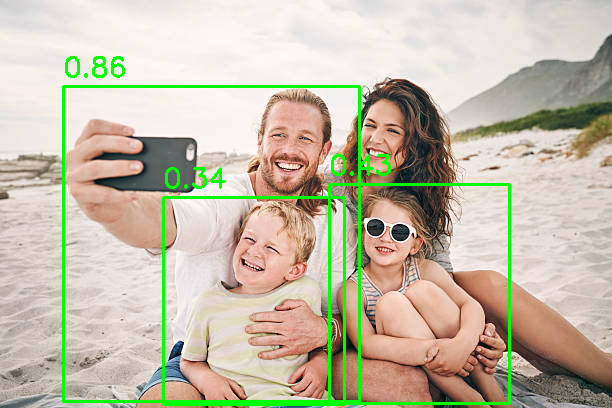

Number of faces detected: 3


In [5]:
# Initialize face counter
face_count = 0

# Process results
for result in results:
    boxes = result.boxes  # Extract boxes

    # Draw bounding boxes on the original image
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]  # Get the bounding box coordinates
        conf = box.conf[0]            # Confidence score
        cls = box.cls[0]              # Class label

        # Assuming class 0 is 'person' or 'face'
        if cls == 0:
            # Increment face counter
            face_count += 1
            # Draw the bounding box
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            # Put the confidence score
            cv2.putText(image, f'{conf:.2f}', (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

from google.colab.patches import cv2_imshow
# Display the image with bounding boxes
cv2_imshow(image)

# Print the number of faces detected
print(f"Number of faces detected: {face_count}")